In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('MovieGenre.csv', encoding = 'latin-1')
df = df.head(1000)

In [3]:
import urllib.request
from PIL import Image
from io import BytesIO

In [4]:
df.drop(columns=[ 'Imdb Link','IMDB Score',], inplace=True)
df.dropna(inplace=True)
df.head(5)


,imdbId,Title,Genre,Poster
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [5]:
df['Genre'] = df['Genre'].str.split('|')

# Get all unique genres
unique_genres = set()
for genres in df['Genre']:
    unique_genres.update(genres)

for genre in unique_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'Genres' column if needed
df.drop('Genre', axis=1, inplace=True)

df.head(5)

,imdbId,Title,Poster,Action,War,Adventure,Biography,Horror,Romance,Musical,...,Sci-Fi,Documentary,Fantasy,Crime,Animation,Family,Sport,Comedy,Western,History
0,114709,Toy Story (1995),https://images-na.ssl-images-amazon.com/images...,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,113497,Jumanji (1995),https://images-na.ssl-images-amazon.com/images...,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,113228,Grumpier Old Men (1995),https://images-na.ssl-images-amazon.com/images...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,114885,Waiting to Exhale (1995),https://images-na.ssl-images-amazon.com/images...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,113041,Father of the Bride Part II (1995),https://images-na.ssl-images-amazon.com/images...,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [6]:
df.isnull().sum()

imdbId         0
Title          0
Poster         0
Action         0
War            0
Adventure      0
Biography      0
Horror         0
Romance        0
Musical        0
Drama          0
Music          0
Short          0
Mystery        0
Thriller       0
Film-Noir      0
Sci-Fi         0
Documentary    0
Fantasy        0
Crime          0
Animation      0
Family         0
Sport          0
Comedy         0
Western        0
History        0
dtype: int64

In [7]:
for x in df.columns:
    if x != 'imdbId':
        df.drop(columns={x},inplace=True)
    if x=='imdbId':
        break



In [8]:
df.columns

Index(['imdbId', 'Title', 'Poster', 'Action', 'War', 'Adventure', 'Biography',
       'Horror', 'Romance', 'Musical', 'Drama', 'Music', 'Short', 'Mystery',
       'Thriller', 'Film-Noir', 'Sci-Fi', 'Documentary', 'Fantasy', 'Crime',
       'Animation', 'Family', 'Sport', 'Comedy', 'Western', 'History'],
      dtype='object')

In [9]:
df['Action'].value_counts()

Action
0    845
1    142
Name: count, dtype: int64

In [10]:
data=df.iloc[:,3:]

In [11]:
average_count = data.sum(axis=0).mean()
print(average_count)

102.52173913043478


In [12]:
# uncomment if you don't want to remove the columns below mean

value_counts = df.iloc[:,3:].apply(pd.value_counts)

# Define a threshold for the value counts
threshold = average_count  # Adjust this threshold based on your criteria

# Identify columns where the value counts are below the threshold
columns_to_drop = value_counts.columns[value_counts.min() < threshold]

# Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

<Figure size 1000x600 with 0 Axes>

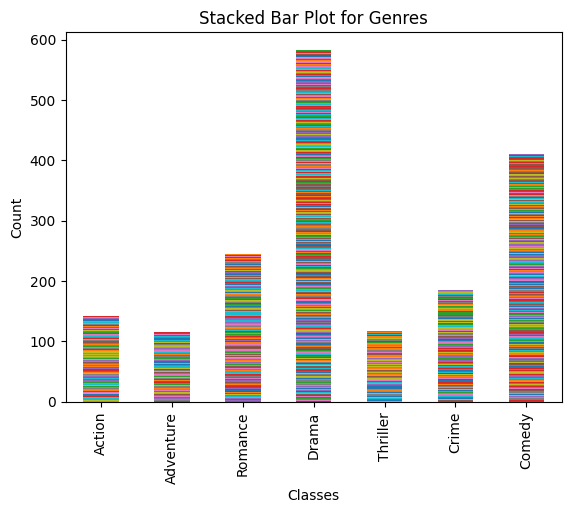

In [13]:
# Heatmap
import matplotlib.pyplot as plt
data=df.iloc[:,3:]

# Stacked Bar Plot
plt.figure(figsize=(10, 6))
data.T.plot(kind='bar', stacked=True)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Genres')
plt.xticks(rotation=90)
plt.legend().remove()
#plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Preprocessing image and converting them to RGB values and normalizing them

In [14]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Function to preprocess image
def preprocess_image(image_path):
    # Open image
    try:
      with urllib.request.urlopen(image_path) as response:
          data = response.read()
          img = Image.open(BytesIO(data))
    except:
        img = Image.open(image_path)

    # Resize to 224x224 pixels
    img = img.resize((224, 224))
    img = img.convert('RGB')
        # Convert to grayscale
    #img = img.convert('L')
        # Convert image to numpy array
    img_array = np.array(img)
        # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
        # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



In [15]:
X = []  # List of preprocessed images
  # List of corresponding genres
for index, row in df.iterrows():
    image_path = row['Poster']  # Assuming 'image_path' contains the file paths of images
    #genre = row[3:]  # Assuming 'genre' contains the genre labels
    try:
      preprocessed_image = preprocess_image(image_path)
      X.append(preprocessed_image)
    except:
       df.drop(df[df['Poster'] == image_path].index, inplace=True)
       pass

In [16]:
y = df.iloc[:,3:].to_numpy()
    #y.append(genre)
print("array denotion")
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)
print("splitting")
# 2. Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

array denotion
splitting


In [17]:
print(X_train.shape, y_train.shape)

(639, 1, 224, 224, 3) (639, 7)


#Training The Model


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [36]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the VGG16 model with pre-trained weights
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the VGG16 model
for layer in vgg16_model.layers:
    layer.trainable = False

# Create a Sequential model
vgg16_custom_model = Sequential()

# Add the VGG16 model to the custom model
vgg16_custom_model.add(vgg16_model)

# Flatten the output of the VGG16 model
vgg16_custom_model.add(Flatten())

# Add a dense layer with 512 units and relu activation
vgg16_custom_model.add(Dense(512, activation='relu'))

# Add the output layer with 7 units and softmax activation for classification
vgg16_custom_model.add(Dense(7, activation='softmax'))

# Print model summary
vgg16_custom_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 27563847 (105.15 MB)
Trainable params: 12849159 (49.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [37]:
vgg16_custom_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
def show(image):
    import matplotlib.pyplot as plt

    # Plot the image using Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.show()

['Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Crime', 'Comedy']
Processing file: https://www.kenosha.com/wp-content/uploads/2023/08/et00072466-jjadjvahwx-landscape-copy.png


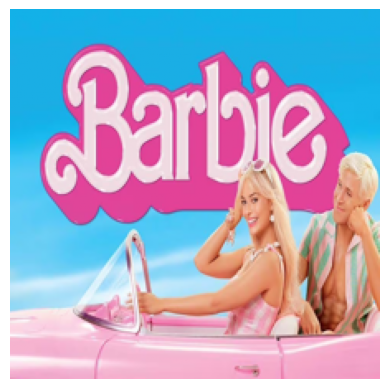

1/1 [==============================] - 1s 736ms/step
3 0.38833341002464294 Drama
4 0.18038363754749298 Thriller
2 0.11810562014579773 Romance
Processing file: https://movies.universalpictures.com/media/opr-tsr1sheet3-look2-rgb-3-1-1-64545c0d15f1e-1.jpg


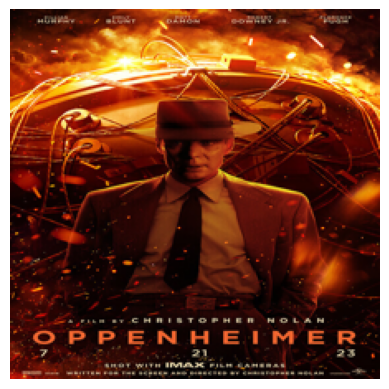

1/1 [==============================] - 1s 815ms/step
3 0.33469027280807495 Drama
4 0.26396358013153076 Thriller
2 0.12495151162147522 Romance
Processing file: https://media.timeout.com/images/106027003/1024/576/image.webp


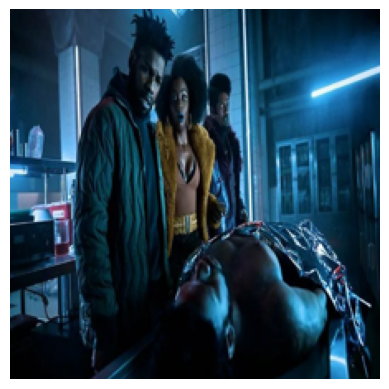

1/1 [==============================] - 1s 965ms/step
3 0.3439384996891022 Drama
2 0.18119098246097565 Romance
4 0.12416112422943115 Thriller


In [39]:
# List of file paths
file4=r'https://media.timeout.com/images/106027003/1024/576/image.webp'
file2=r'https://movies.universalpictures.com/media/opr-tsr1sheet3-look2-rgb-3-1-1-64545c0d15f1e-1.jpg'
file1=r'https://www.kenosha.com/wp-content/uploads/2023/08/et00072466-jjadjvahwx-landscape-copy.png'
#file3=r'https://theobjectivestandard.com/wp-content/uploads/2022/03/3-Idiots-Written-and-Directed-by-Rajkumar-Hirani-2048x1216.jpg'
file_paths = [file1, file2, file4]  # Add all file paths here
genres= df.iloc[:,3:].columns.to_list()
print(genres)
# Iterate over each file path
for file_path in file_paths:
    print("Processing file:", file_path)

    # Preprocess the image
    preprocessed_image = preprocess_image(file_path)

    show(preprocessed_image.reshape(224, 224, 3))

    # Make predictions using the ResNet model
    predictions = vgg16_custom_model.predict(preprocessed_image)
    predictions = predictions.tolist()

    # Process predictions
    classes = []
    for x in predictions:
        for y in x:
            classes.append(y)

    # Print the top 3 predicted genres
    i = 0
    while i!=3:
      print(classes.index(max(classes)), max(classes), genres[classes.index(max(classes))])
      classes[classes.index(max(classes))]= -1000
      i+=1


In [40]:
# Train the model
history = vgg16_custom_model.fit(X_train, y_train, batch_size=16, epochs=2, validation_data=(X_val, y_val))

# Evaluate model on validation data
val_loss, val_accuracy = vgg16_custom_model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/2
40/40 [==============================] - 541s 14s/step - loss: 11.6324 - accuracy: 0.2363 - val_loss: 8.6182 - val_accuracy: 0.1875
Epoch 2/2
5/5 [==============================] - 99s 20s/step - loss: 28.3856 - accuracy: 0.2500
Validation Loss: 28.385583877563477
Validation Accuracy: 0.25


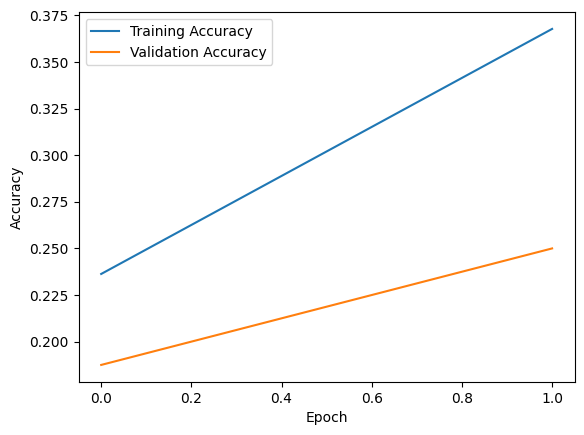

In [41]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 95s 19s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        37
           3       0.72      0.55      0.62        95
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        24
           6       0.56      0.80      0.66        61

   micro avg       0.64      0.35      0.45       287
   macro avg       0.18      0.19      0.18       287
weighted avg       0.36      0.35      0.35       287
 samples avg       0.63      0.38      0.46       287

ROC AUC Score: 0.6374524323748975


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


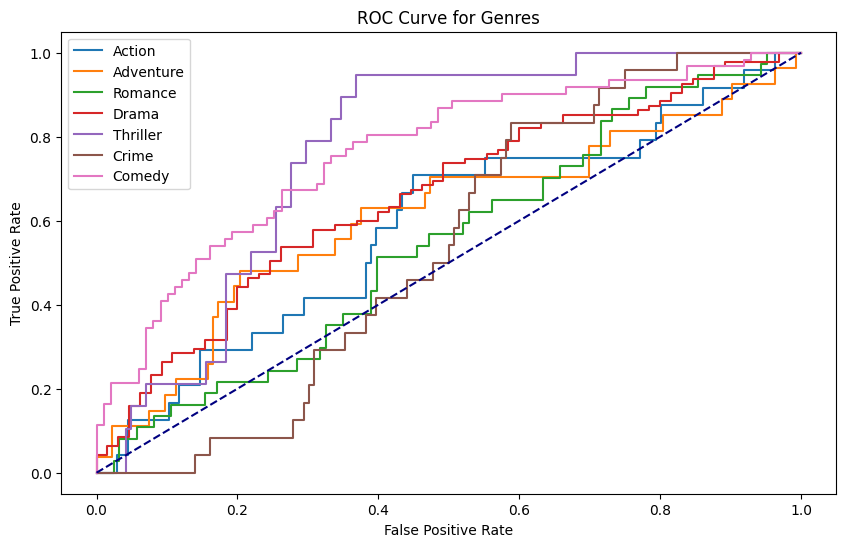

F1 Score: 0.1835595218828752


In [42]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score

# Make predictions on the validation data
y_pred = vgg16_custom_model.predict(X_val)

# Convert predictions to binary form using a threshold
y_pred_binary = (y_pred > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

# Calculate and print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_val, y_pred))

# Calculate and plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(genres)):
    fpr, tpr, _ = roc_curve(y_val[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=genres[i])

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Genres')
plt.legend()
plt.show()

# Calculate and print F1 score
print("F1 Score:", f1_score(y_val, y_pred_binary, average='macro'))


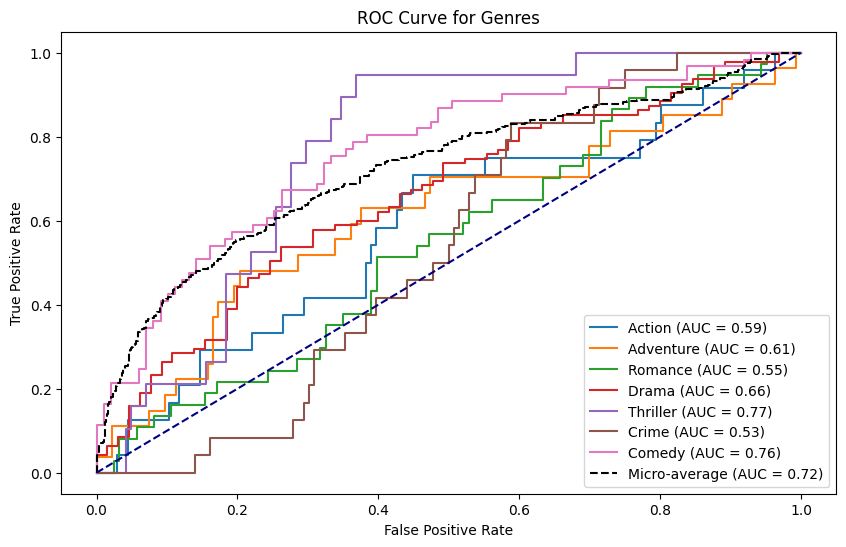

ROC AUC score for Action: 0.5860906862745098
ROC AUC score for Adventure: 0.609857978279031
ROC AUC score for Romance: 0.5460338387167656
ROC AUC score for Drama: 0.6563562753036437
ROC AUC score for Thriller: 0.7678238148562897
ROC AUC score for Crime: 0.5346200980392157
ROC AUC score for Comedy: 0.761384335154827
Micro-average ROC AUC score: 0.7222540584177922


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and ROC AUC score for each class
roc_auc_scores = []
plt.figure(figsize=(10, 6))
for i in range(len(genres)):
    fpr, tpr, _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc = roc_auc_score(y_val[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'{genres[i]} (AUC = {roc_auc:.2f})')
    roc_auc_scores.append(roc_auc)

# Plot micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc_micro = roc_auc_score(y_val.ravel(), y_pred.ravel())
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})', linestyle='--', color='black')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Genres')
plt.legend()
plt.show()

# Print ROC AUC scores for each class
for i, genre in enumerate(genres):
    print(f'ROC AUC score for {genre}: {roc_auc_scores[i]}')

# Print micro-average ROC AUC score
print(f'Micro-average ROC AUC score: {roc_auc_micro}')
